In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_800ppc/'
# deck = 'KH_beta0.1/'
deck = 'KH_400ppc_200wci2/'

dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

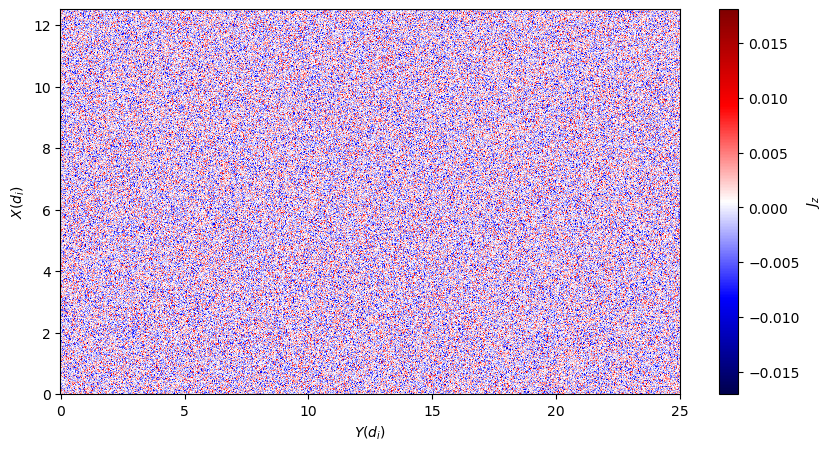

In [3]:
vars = tb.load_var('jz', dirs, 0, 'electron')
figs = '/pscratch/sd/g/goodwill/Fig/' + deck
lab = r'$J_z$'
vpic_info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
dt = vpic_info['dt*wci']
Lx = np.linspace(0, vpic_info['Lx/di'], int(vpic_info['nx']))
Ly = np.linspace(0,vpic_info['Ly/di'], int(vpic_info['ny']))
min = 0.0
max = 0.1
fig, ax = plt.subplots(figsize=(10, 5))
cax = ax.pcolormesh(Ly, Lx, np.array(vars), cmap = 'seismic')
ax.set_xlabel(r'$Y (d_i)$')
ax.set_ylabel(r'$X (d_i)$')
fig.colorbar(cax, label = lab)

In [4]:
from TurbPy.vpic_info import *
from TurbPy.load_vars import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def make_movie(dirs, deck, interval = 100, min = 0.0, max = 0.1, saveas = 'var', fl = 'mp4', lab = 'var', figshape = (10, 10), cmap = 'seismic'):
   figs = '/pscratch/sd/g/goodwill/Fig/' + deck
   


   vpic_info = get_vpic_info(dirs)
   times = get_times(dirs)
   dt = vpic_info['dt*wci']
   Lx = np.linspace(0, vpic_info['Lx/di'], int(vpic_info['nx']))
   Ly = np.linspace(0,vpic_info['Ly/di'], int(vpic_info['ny']))
   

   el = tb.load_hydro_fil(dirs, times[0], species = 'electron')
   ion = tb.load_hydro_fil(dirs, times[0], species = 'ion')
   f = tb.load_field_fil(dirs, times[0])

   
   ds = np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2)

   fig, ax = plt.subplots(figsize=figshape)
   cax = ax.pcolormesh(Ly, Lx, ds, cmap = cmap, vmin = min, vmax = max)
   ax.set_xlabel(r'$Y (d_i)$')
   ax.set_ylabel(r'$X (d_i)$')
   fig.colorbar(cax, label = lab)
   plt.show()
   def animate(i):
      if i % 10 == 0 :
         plt.show()
         print(times[i])
      el = tb.load_hydro_fil(dirs, times[i], species = 'electron')
      ion = tb.load_hydro_fil(dirs, times[i], species = 'ion')
      ds = np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2)
      ax.set_title(r'$(t \omega_{ci} =$' + str(np.round(times[i] * dt,2)) + ')')
      cax.set_array(np.array(ds).flatten())
      return cax

   anim = animation.FuncAnimation(fig, animate , interval = interval, frames=len(times) - 2)
   anim.save(figs + saveas + '.' + fl)
   plt.show()


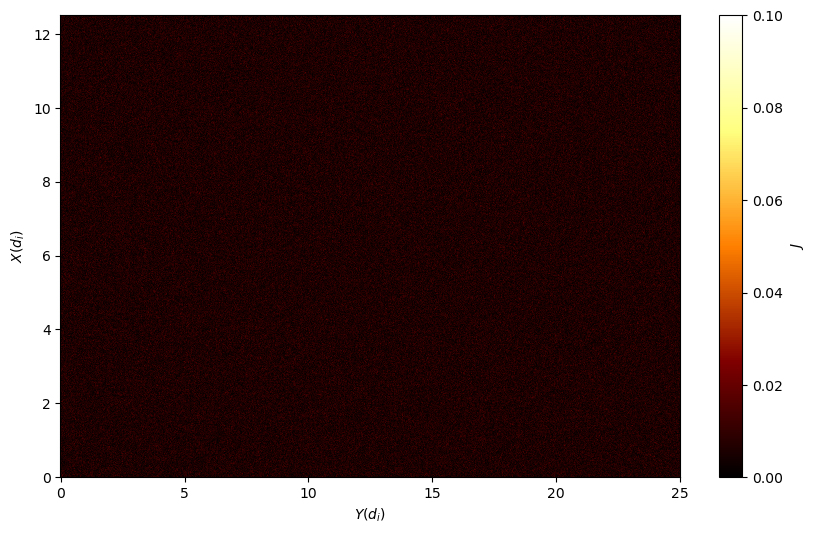

0
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000


In [5]:
make_movie(dirs, deck, lab = r'$J$', figshape = (10,6), cmap = 'afmhot')